In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#1. Reading and ploting the data
data1=pd.read_csv("C:/Users/Kavin/Downloads/Sparkling.csv", parse_dates=True, squeeze= True, index_col=0)

C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\4078133777.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data1=pd.read_csv("C:/Users/Kavin/Downloads/Sparkling.csv", parse_dates=True, squeeze= True, index_col=0)


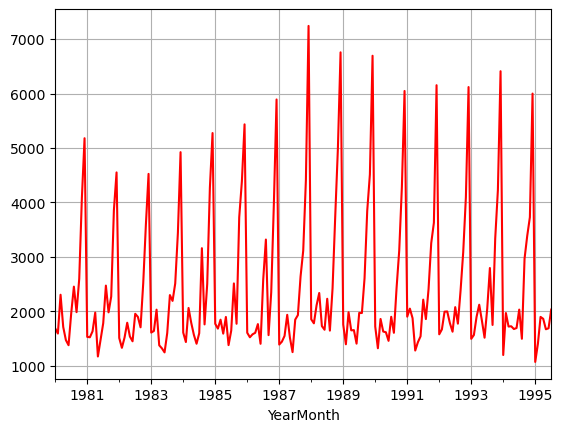

In [3]:
data1.plot(style="r");
plt.grid()
    

In [4]:
#Decompose the time series additively
data1_add_decompose = seasonal_decompose(data1, model = 'additive', period = 12)

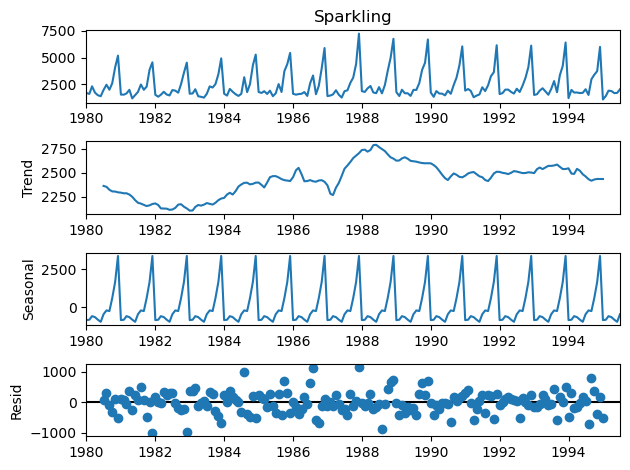

In [5]:
data1_add_decompose.plot()
plt.show()

In [6]:
#Decompose the time series additively
data1_mul_decompose = seasonal_decompose(data1, model = 'multiplicative', period = 12)

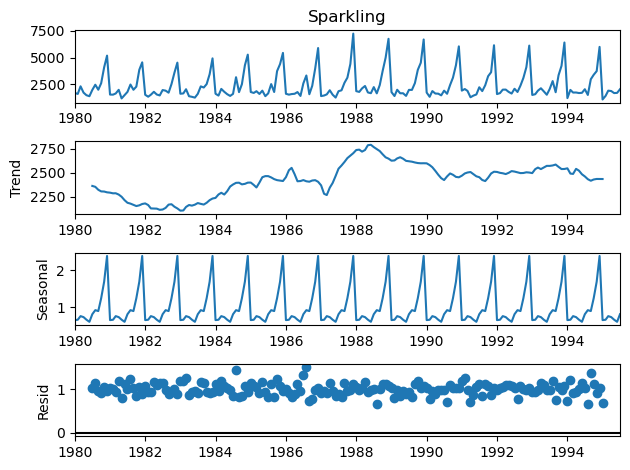

In [7]:
data1_mul_decompose.plot()
plt.show()

In [8]:
data2=pd.read_csv("C:/Users/Kavin/Downloads/Sparkling.csv")

In [9]:
data2.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [10]:
data2.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


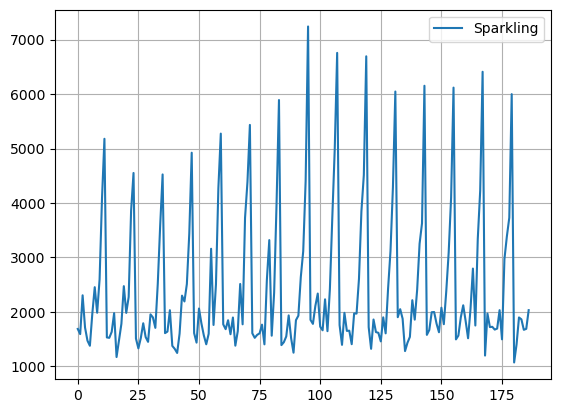

In [11]:
data2.plot()
plt.grid()

In [12]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date
data2

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


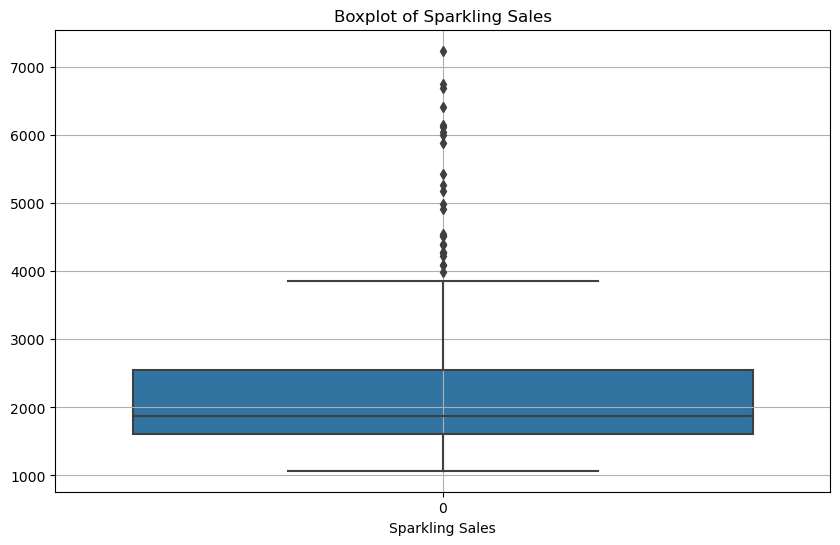

In [13]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=data2['Sparkling'])  
plt.title('Boxplot of Sparkling Sales') 
plt.xlabel('Sparkling Sales')  
plt.grid(True)  
plt.show()  


In [14]:
data2['Time_Stamp'] = pd.DataFrame(date,columns=['M'])
data2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


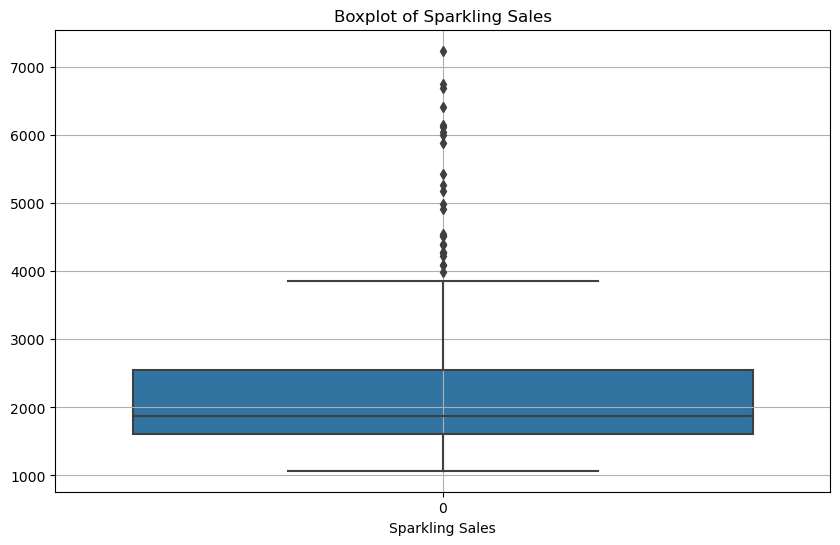

In [15]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=data2['Sparkling']) 
plt.title('Boxplot of Sparkling Sales')  
plt.xlabel('Sparkling Sales')  
plt.grid(True)  
plt.show()  

In [16]:
# Set 'Time_Stamp' column as the index
data2.set_index('Time_Stamp', inplace=True)

# Drop the 'Date' column
data2.drop(labels='YearMonth', axis=1, inplace=True)

# Display the DataFrame
data2.head()


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [17]:
yearly_sales_across_months = pd.pivot_table(data2, values = 'Sparkling', columns = data2.index.month, 
                                        index = data2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


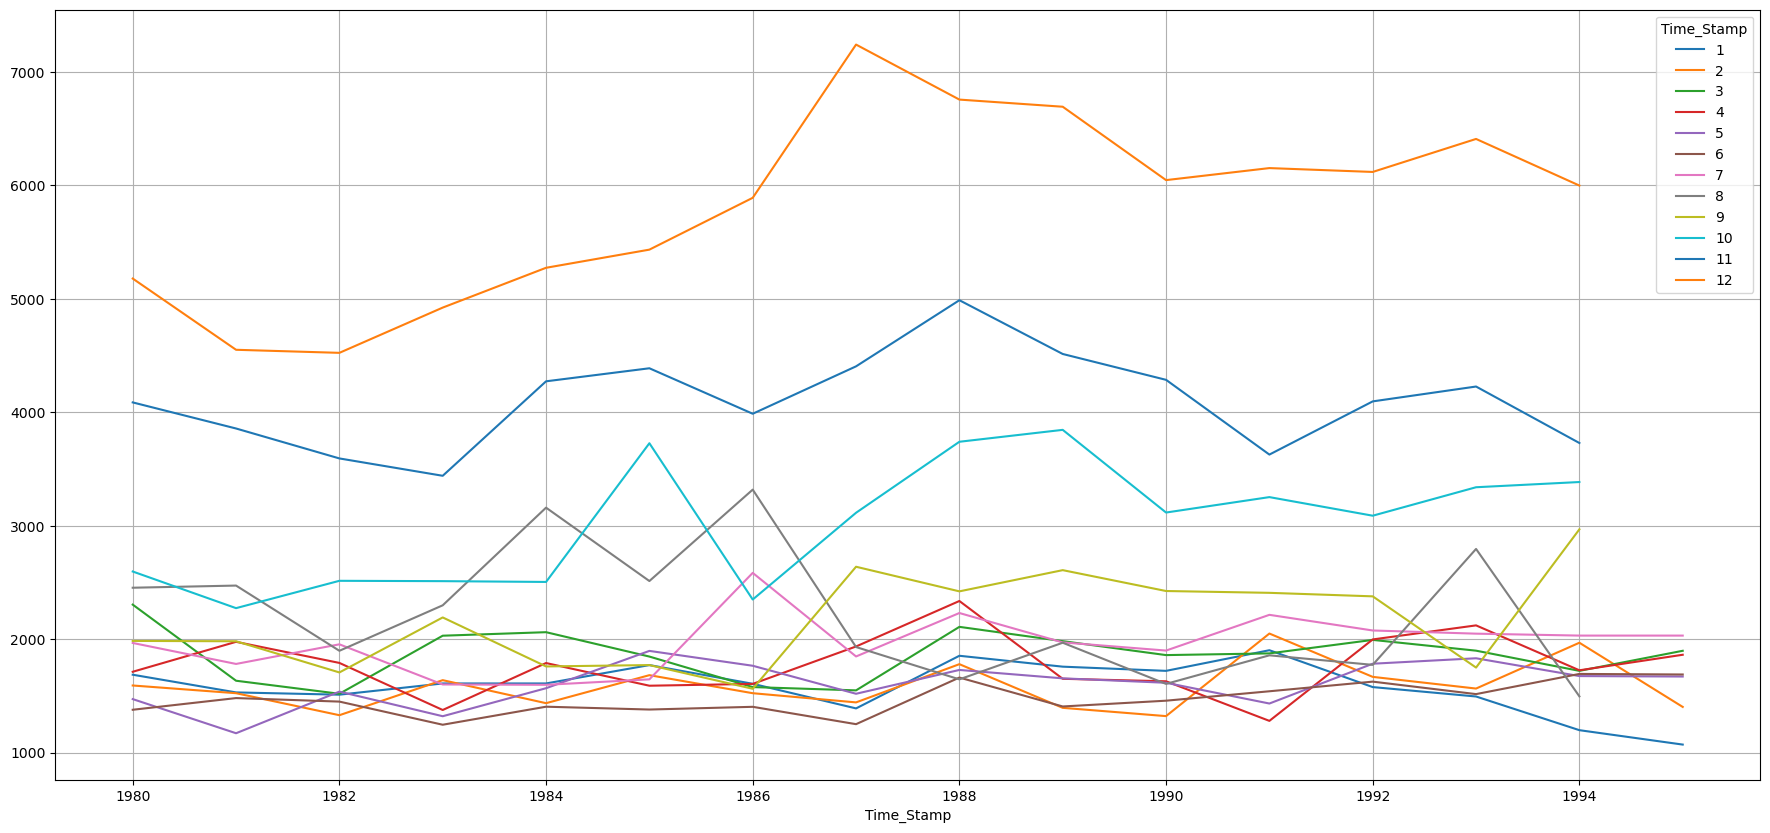

In [18]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [19]:
# 3. Spliting data into training and test
train = data2.loc[data2.index < '1991-01-01']
test = data2.loc[data2.index >= '1991-01-01']

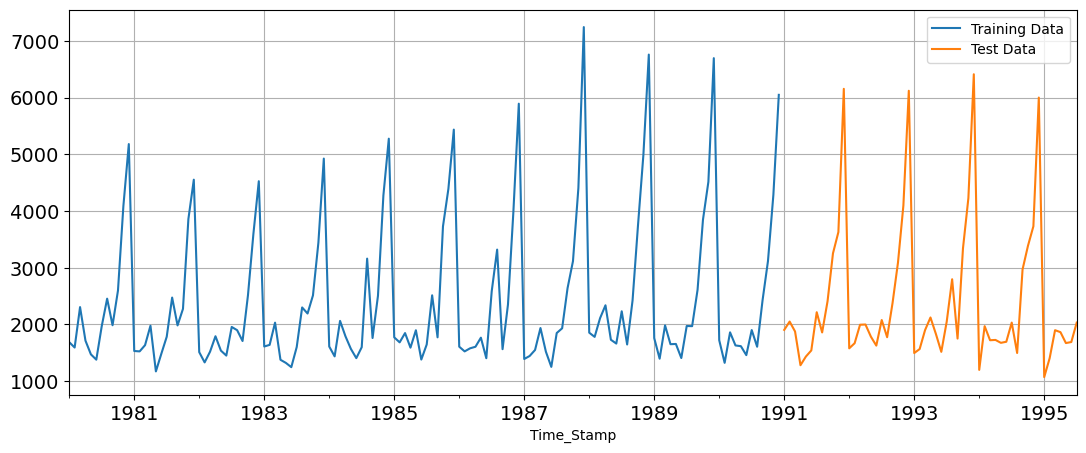

In [20]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [21]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


In [22]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [23]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data


,Sparkling,time
Time_Stamp,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data


,Sparkling,time
Time_Stamp,,
1991-01-31,1902,134
1991-02-28,2049,135
1991-03-31,1874,136
1991-04-30,1279,137
1991-05-31,1432,138


Last few rows of Test Data


,Sparkling,time
Time_Stamp,,
1995-03-31,1897,184
1995-04-30,1862,185
1995-05-31,1670,186
1995-06-30,1688,187
1995-07-31,2031,188


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

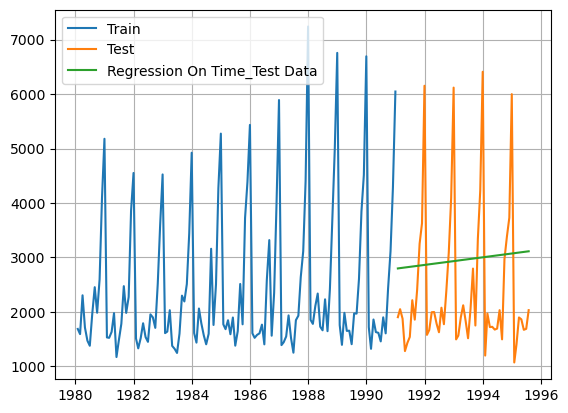

In [27]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [28]:
from sklearn import metrics

In [29]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1391.455 


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758


In [31]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [32]:
train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [33]:
MovingAverage = data2.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [34]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

In [35]:
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


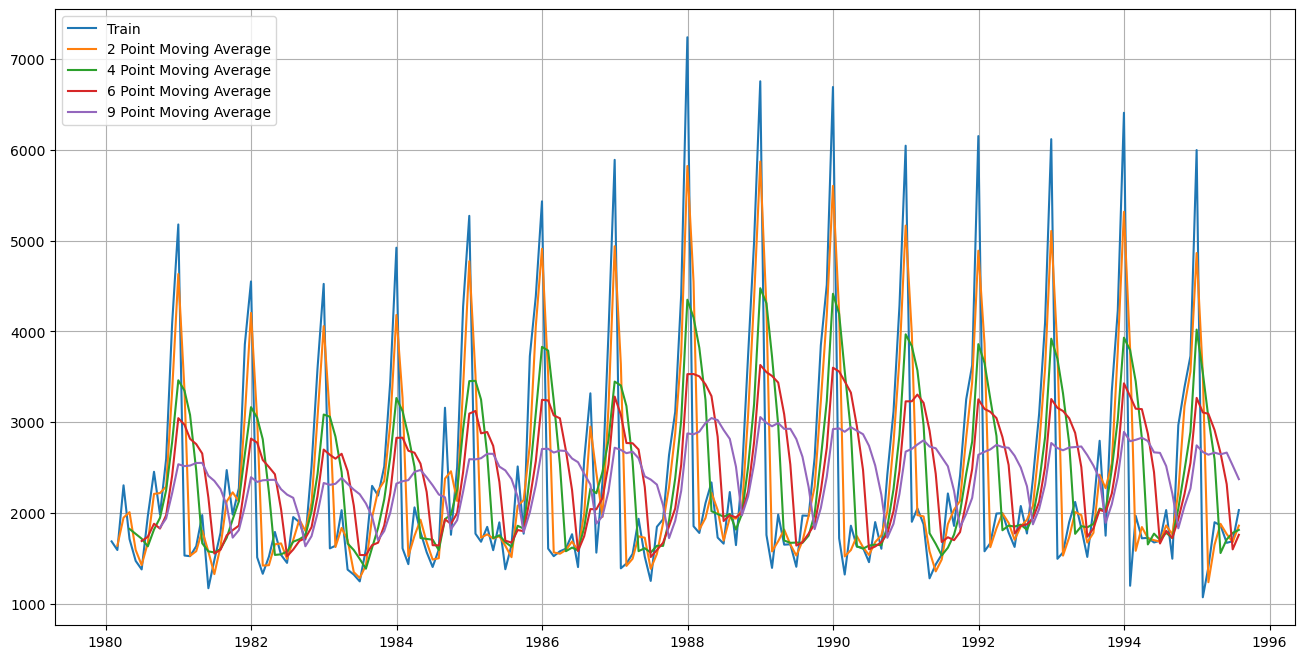

In [36]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [37]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 5)
(132, 5)


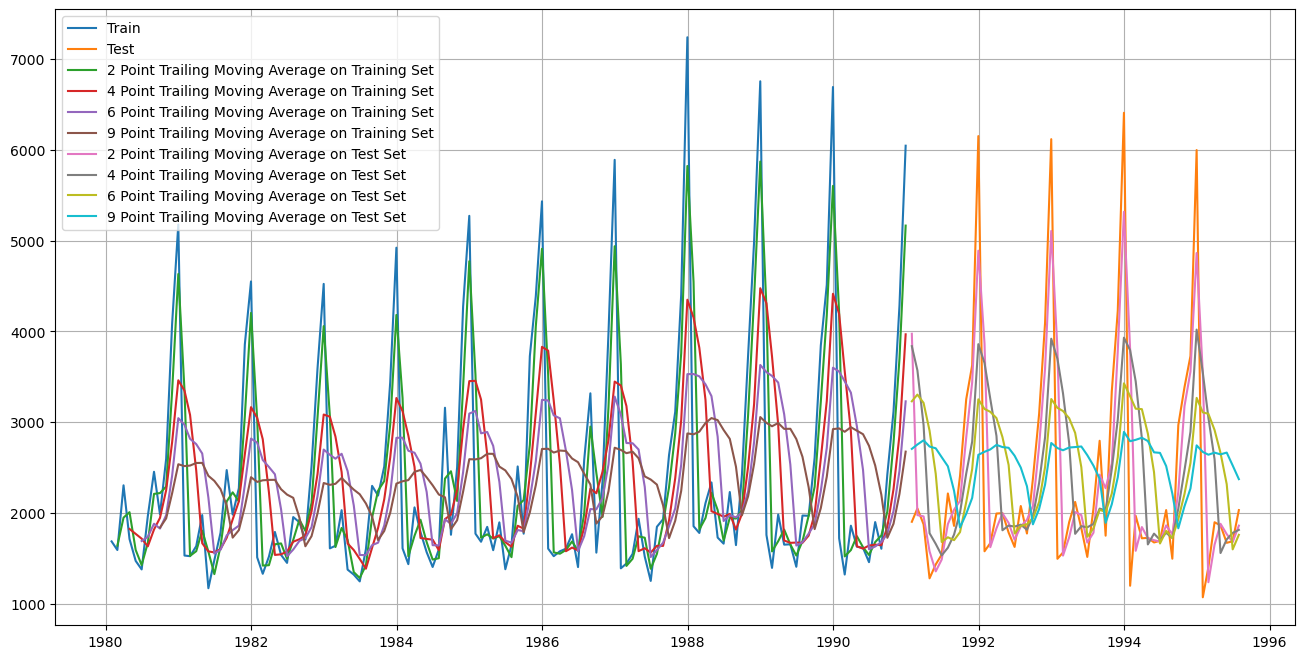

In [38]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [39]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [40]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


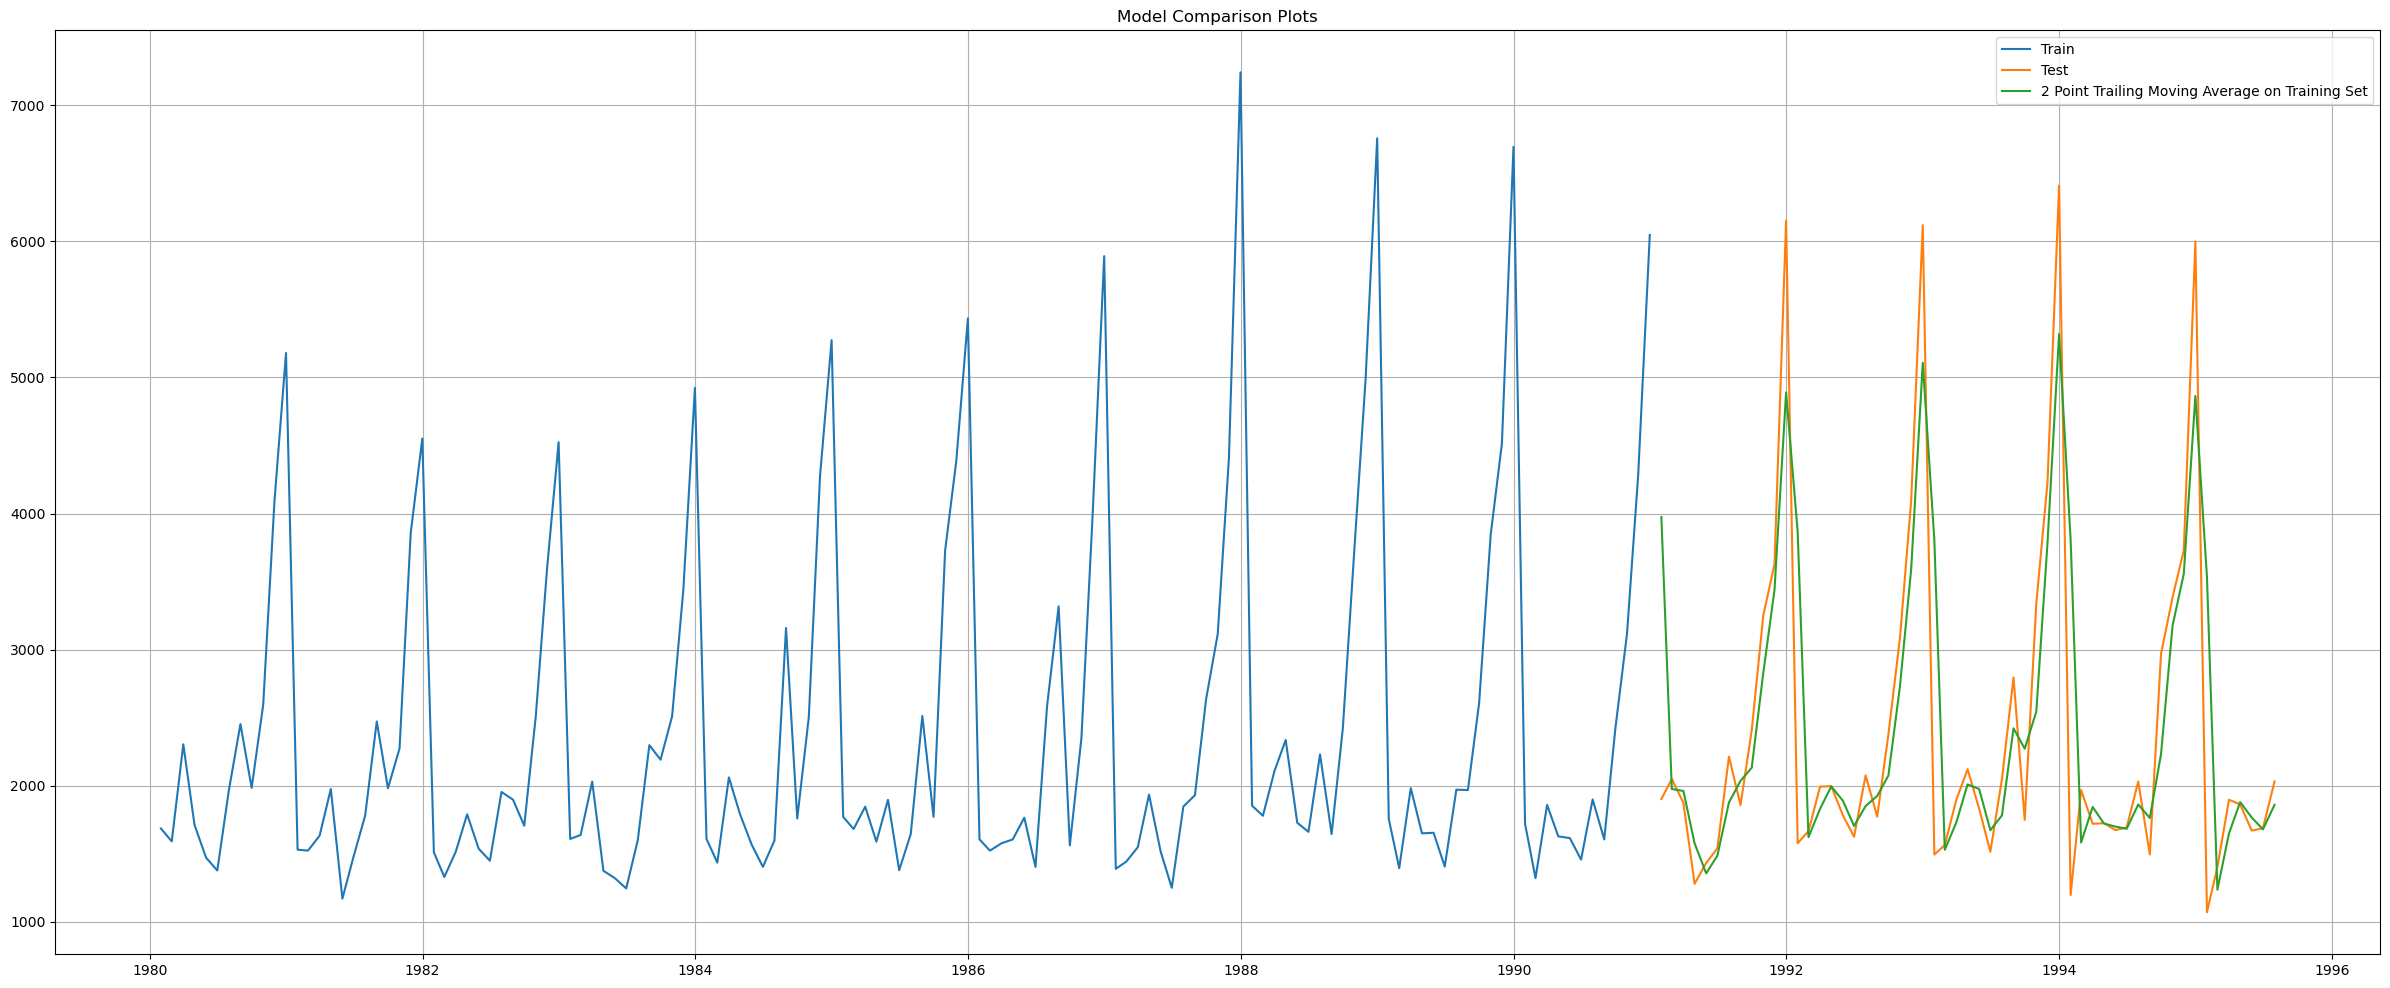

In [41]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')




plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [42]:
#Method-3 - Simple Exponential Smoothing

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [44]:
SES_train = train.copy()
SES_test = test.copy()

In [45]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [46]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [48]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [49]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2725.336037
1991-02-28,2049,2725.336037
1991-03-31,1874,2725.336037
1991-04-30,1279,2725.336037
1991-05-31,1432,2725.336037


In [50]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1861834024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1861834024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1861834024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1861834024.py:13: FutureWarning: The frame.append method is deprecated and 

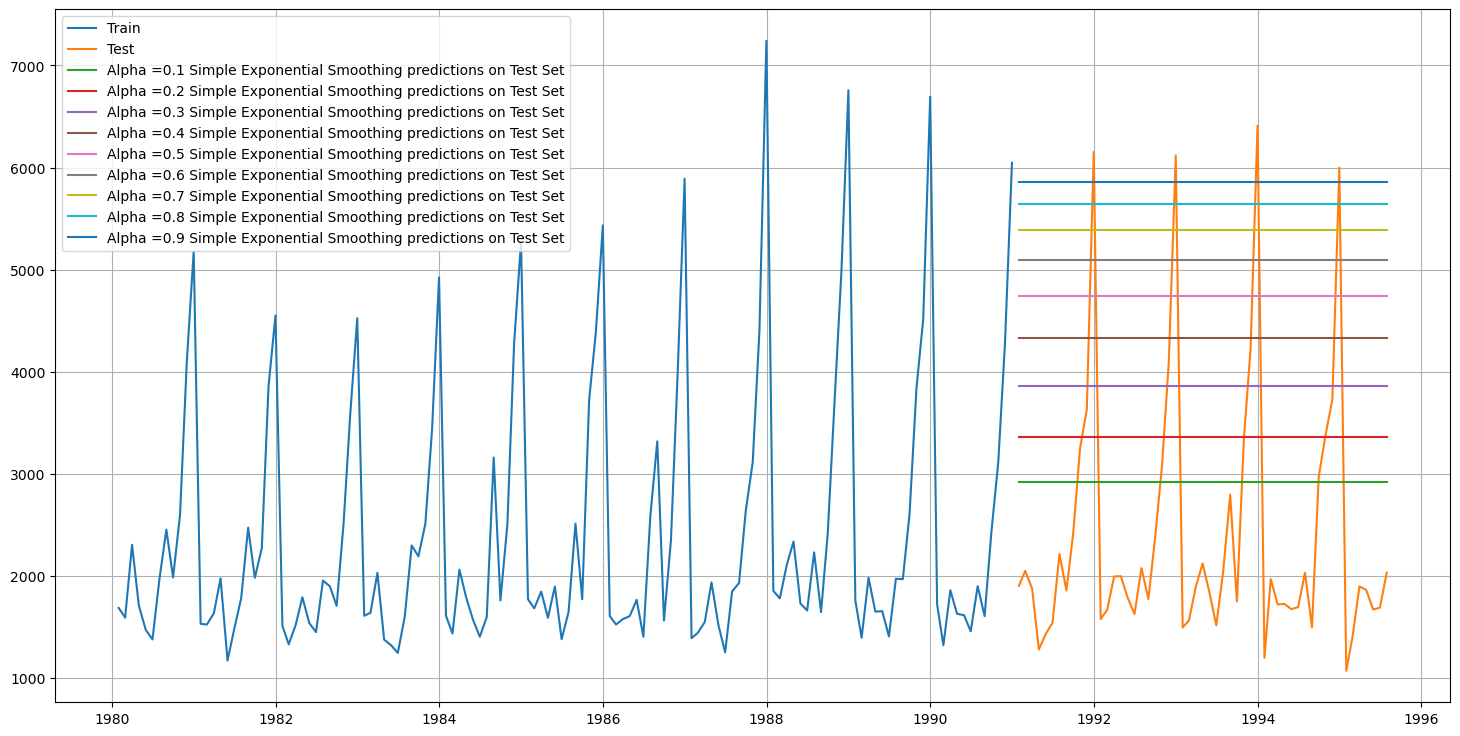

In [51]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [52]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


In [53]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


In [54]:
DES_train = train.copy()
DES_test = test.copy()

In [55]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [56]:
## First we will define an empty dataframe to store our values from the loop

resultsDes = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDes

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [57]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDes = resultsDes.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDes

C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1760502401.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1760502401.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDes = resultsDes.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1760502401.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1760502401.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
2,0.1,0.3,1445.762015,4293.084674
3,0.1,0.4,1480.897776,6039.537339
4,0.1,0.5,1521.108657,7390.522201
...,...,...,...,...
95,1.0,0.6,1753.402326,49327.087977
96,1.0,0.7,1825.187155,52655.765663
97,1.0,0.8,1902.013709,55442.273880
98,1.0,0.9,1985.368445,57823.177011


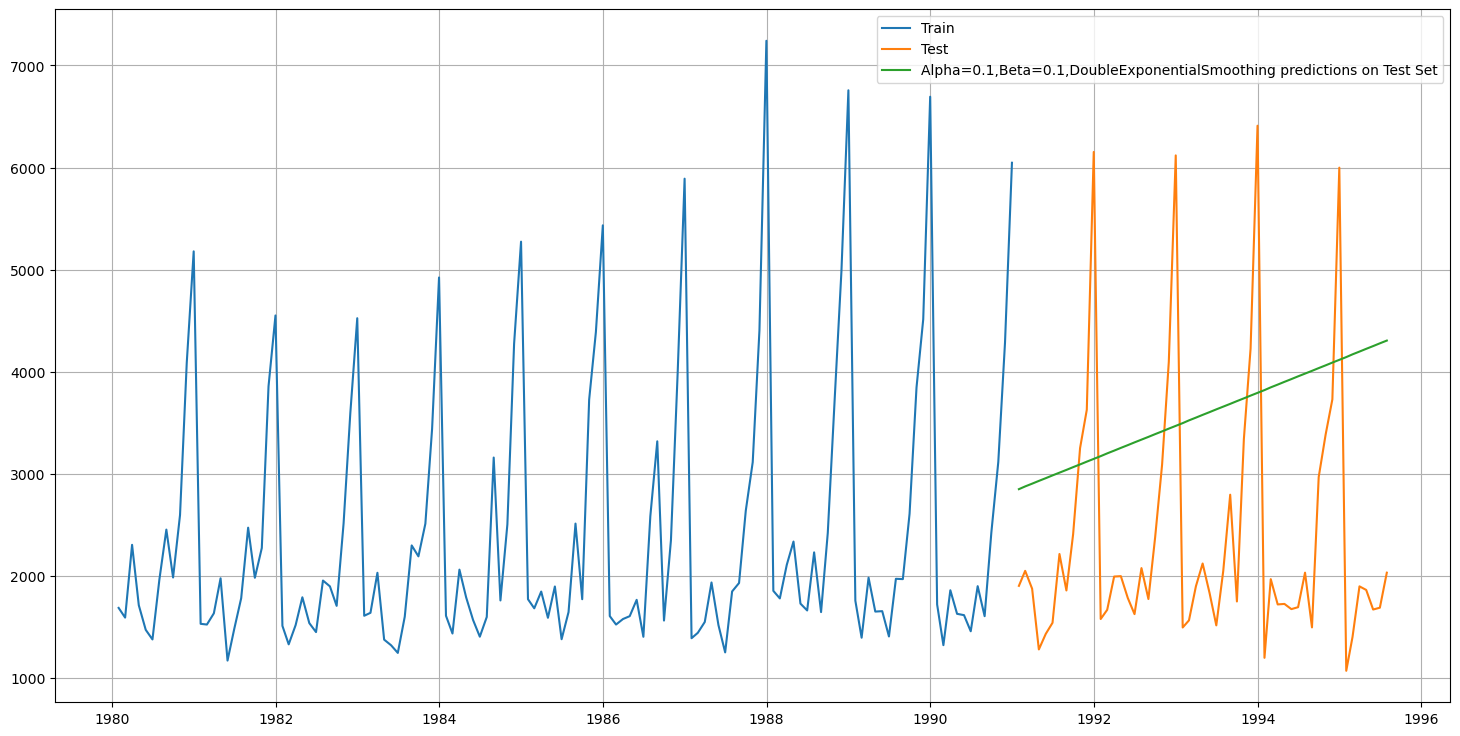

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train["Sparkling"], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [59]:
resultsDes.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


In [60]:
resultsDes_ = pd.DataFrame({'Test RMSE': [resultsDes.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDes_])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670


In [61]:
#Triple Exponential Model
TES_train = train.copy()
TES_test = test.copy()

In [62]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [63]:
model_TES_autofit = model_TES.fit()

In [64]:
model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1587.923122
1991-02-28,2049,1356.650595
1991-03-31,1874,1763.350752
1991-04-30,1279,1656.524633
1991-05-31,1432,1542.386930


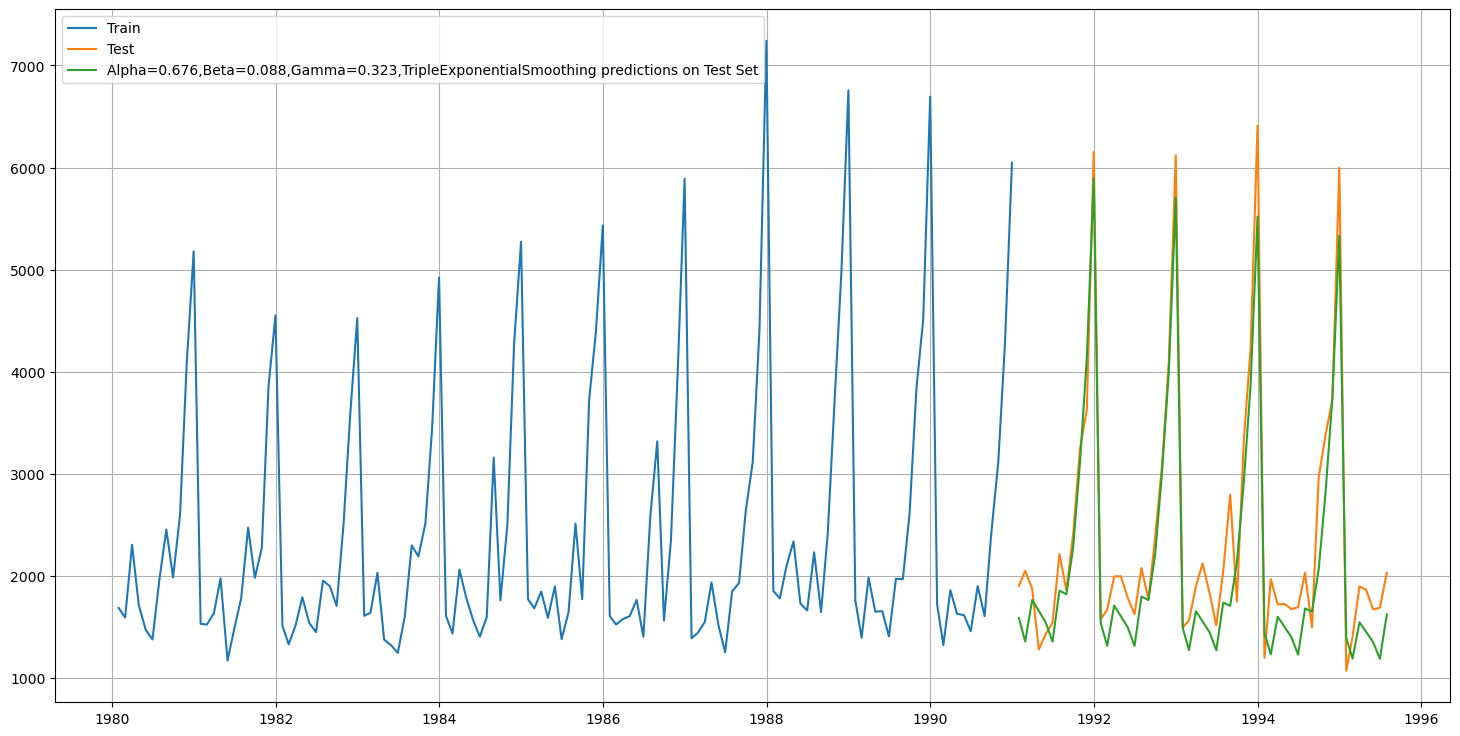

In [66]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [67]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 402.936


In [68]:
resultsDf_3_ = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_])
resultsDf


,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179


In [69]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 402.936


In [70]:
#Model--6 Naive


In [71]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [72]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [73]:
NaiveModel_test["naive"]= np.asarray(train["Sparkling"])[len(np.asarray(train["Sparkling"]))-1]
NaiveModel_test["naive"].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

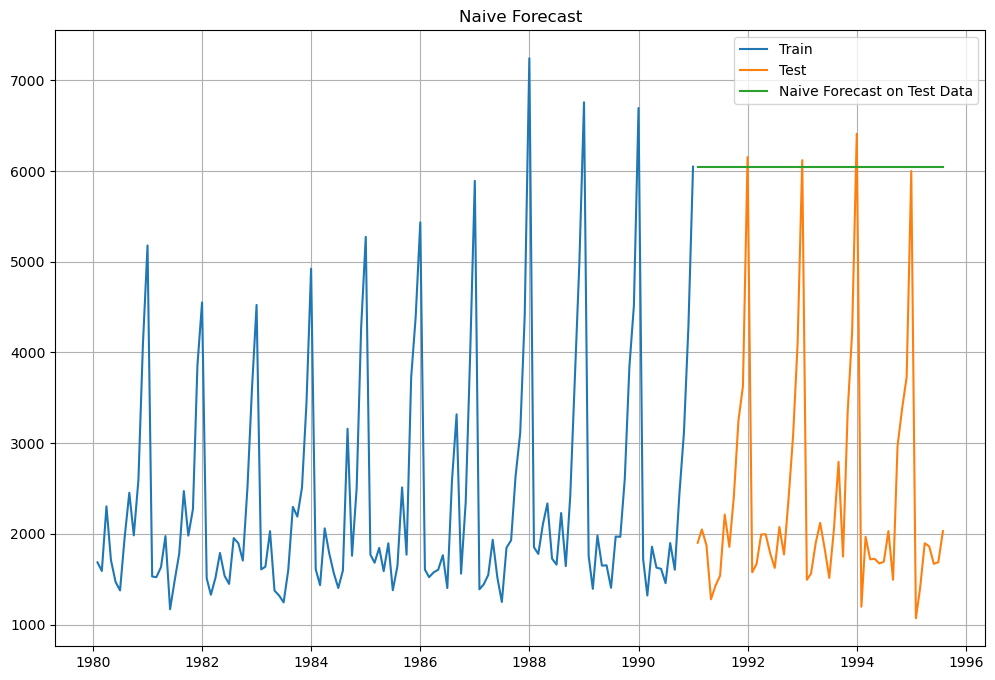

In [74]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train["Sparkling"], label="Train")
plt.plot(test["Sparkling"], label="Test")
plt.plot(NaiveModel_test["naive"], label="Naive Forecast on Test Data")
plt.legend(loc="best")
plt.title("Naive Forecast")
plt.grid();

In [75]:
rmse_naive_test=metrics.mean_squared_error(test["Sparkling"], NaiveModel_test["naive"],squared=False)
print("For Naive forecast on the test data, RMSE is %3.3f" %(rmse_naive_test))

For Naive forecast on the test data, RMSE is 3864.279


In [76]:
 resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_naive_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179
NaiveModel,3864.279352


In [77]:
#Method - 7 Simple Average

In [78]:
SimpleAverage_train=train.copy()
SimpleAverage_test=test.copy()

In [79]:
SimpleAverage_test["mean_forecast"] = train["Sparkling"].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


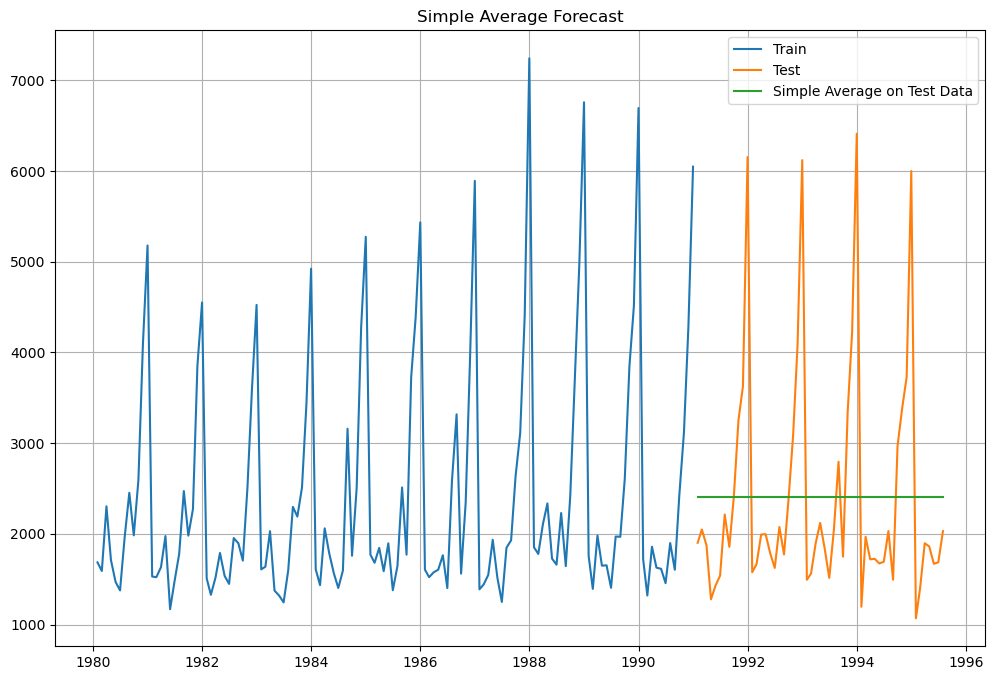

In [80]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train["Sparkling"], label="Train")
plt.plot(SimpleAverage_test["Sparkling"], label="Test")
plt.plot(SimpleAverage_test["mean_forecast"], label="Simple Average on Test Data")
plt.legend(loc="best")
plt.title("Simple Average Forecast")
plt.grid();

In [81]:
#RMSE
rmse_avg_test= metrics.mean_squared_error(test["Sparkling"],SimpleAverage_test["mean_forecast"],squared=False)
print("For simple average forecast on the test data, RMSE is %3.3f"%(rmse_avg_test))

For simple average forecast on the test data, RMSE is 1275.082


In [82]:
 resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_avg_test]},index=['AverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf    

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179
NaiveModel,3864.279352
AverageModel,1275.081804


In [83]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

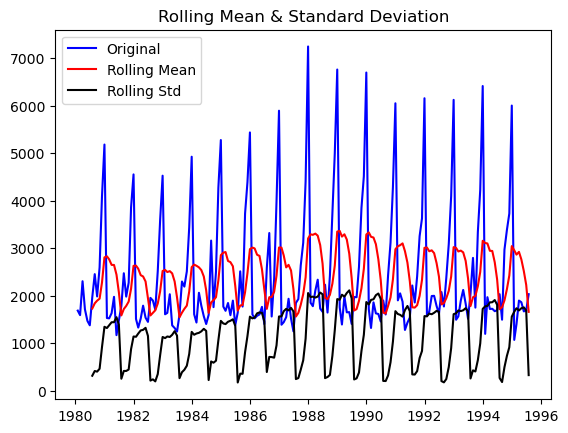

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [84]:
test_stationarity(data2['Sparkling'])

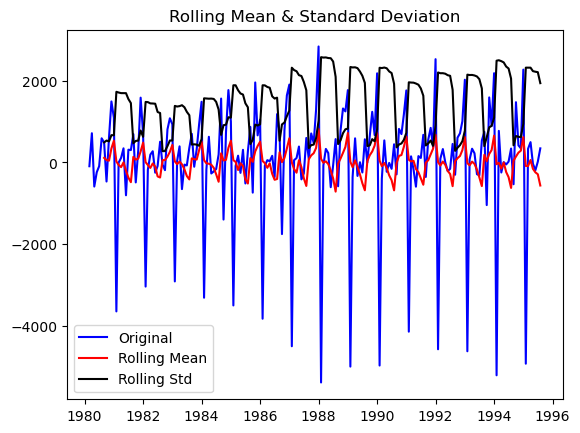

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [85]:
test_stationarity(data2['Sparkling'].diff().dropna())

In [86]:
#1.6

In [87]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [88]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [89]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be

ARIMA(0, 1, 3) - AIC:2233.994857739737
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2213.509212423273


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

ARIMA(2, 1, 3) - AIC:2232.8113519358258
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.498899377492


C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2230.829849760188
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [90]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.461689
14,"(3, 1, 2)",2230.829850
11,"(2, 1, 3)",2232.811352
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.498899
7,"(1, 1, 3)",2235.607815


In [91]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Mon, 29 Jan 2024   AIC                           2213.509
Time:                        21:05:04   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [92]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [93]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.979592305803


In [94]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto Arima'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

   

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179
NaiveModel,3864.279352
AverageModel,1275.081804


In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [97]:
import statsmodels.api as sm
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236082
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158605424


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920842
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566505


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.70895733646
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838273


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193763636


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653481305


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176802


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084897977


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824318277
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687527


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789891716817


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332314958


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.167507099249


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.160506675211


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774509245


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543882325515


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215633313209
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990429


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354565
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331317


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359450557


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402561833


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128692


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132636088


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067498607
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154564


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.355897413113


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352613967


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.142446661387


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167469448857


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248866886283


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687877


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142239239378


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968167247
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505316


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307496957


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421443048


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799306375


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871798475965


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842469313552


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216937905103


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5115790687998


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345641415425
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435405016


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303980916
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066059988


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349664176


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204835687


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464807155


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344987319949


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191732853117
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145529


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0169972775045


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032682


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429006103


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125271457


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279985003


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896845


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585687144


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428953361597
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868115136541


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372642014034


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432488953


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140992982597


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086068876127


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404041545796


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1600.3566737453523


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476023063497


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401268770187


C:\Users\Kavin\AppData\Local\Temp\ipykernel_6040\1939519882.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [98]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934564
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340404


In [99]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Mon, 29 Jan 2024   AIC                           1555.584
Time:                                    21:06:21   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

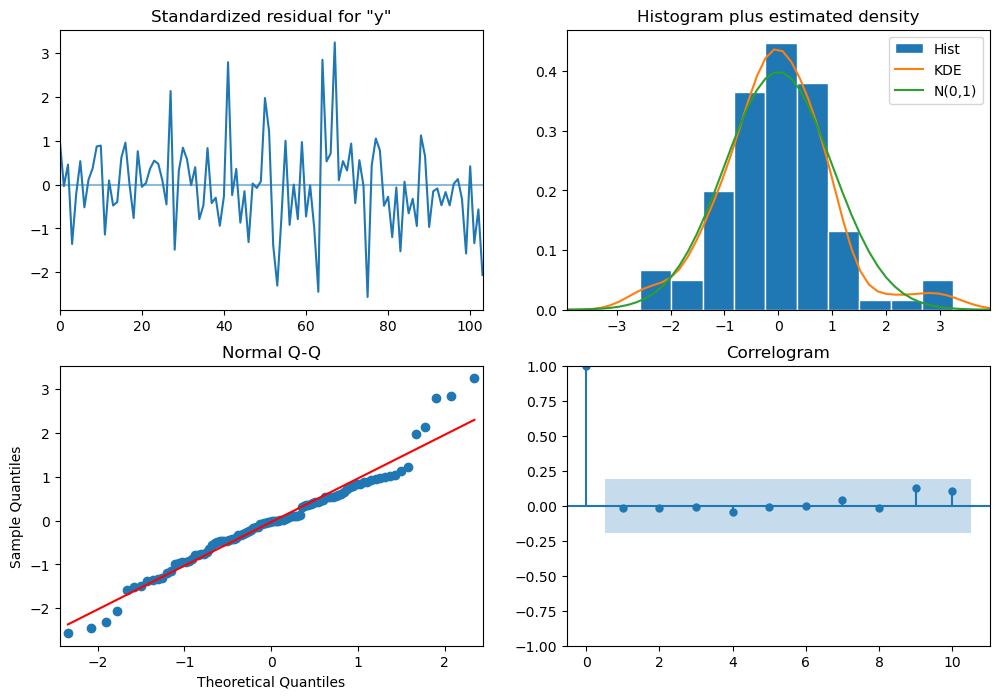

In [100]:
results_auto_SARIMA_6.plot_diagnostics(figsize=(12, 8))
plt.show()

In [101]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
AverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
Auto Arima,1299.979592
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
RegressionOnTime,1391.454758
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670


In [102]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.413591,388.343385,566.274542,2088.552640
1,1315.137374,402.005579,527.220918,2103.053830
2,1621.614045,401.999185,833.710121,2409.517969
3,1598.892271,407.236403,800.723587,2397.060955
4,1392.715267,407.966275,593.116061,2192.314473


In [103]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.5896060074083


In [104]:
resultssarima = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultssarima])
resultsDf

,Test RMSE
RegressionOnTime,1391.454758
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",402.936179
NaiveModel,3864.279352
AverageModel,1275.081804


In [105]:
fullmodel1 = ExponentialSmoothing(data2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.676,
                                                                 smoothing_trend=0.088,
                                                                 smoothing_seasonal=0.323)

C:\Users\Kavin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [106]:
RMSE_fullmodel1 = metrics.mean_squared_error(data2['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 444.4750026079448


In [107]:

prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-31    2002.257894
1995-09-30    2791.684060
1995-10-31    3437.847221
1995-11-30    4298.478495
1995-12-31    6846.035688
1996-01-31    1467.121712
1996-02-29    1999.622103
1996-03-31    2192.419093
1996-04-30    1989.876050
1996-05-31    1799.739553
1996-06-30    1744.222605
1996-07-31    2182.643658
Freq: M, dtype: float64

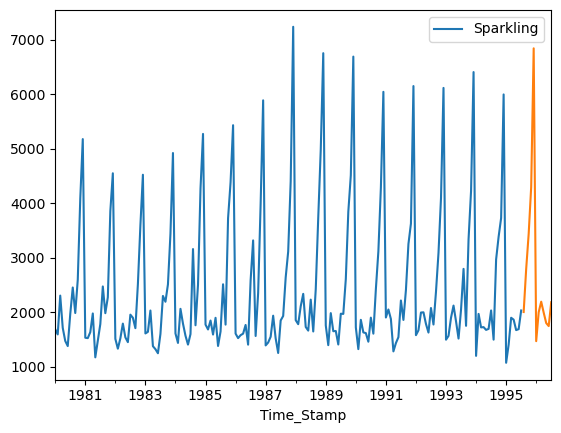

In [108]:
data2.plot()
prediction_1.plot();

In [109]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1128.796527,2002.257894,2875.719262
1995-09-30,1918.222693,2791.684060,3665.145428
1995-10-31,2564.385854,3437.847221,4311.308588
1995-11-30,3425.017127,4298.478495,5171.939862
1995-12-31,5972.574320,6846.035688,7719.497055


[]

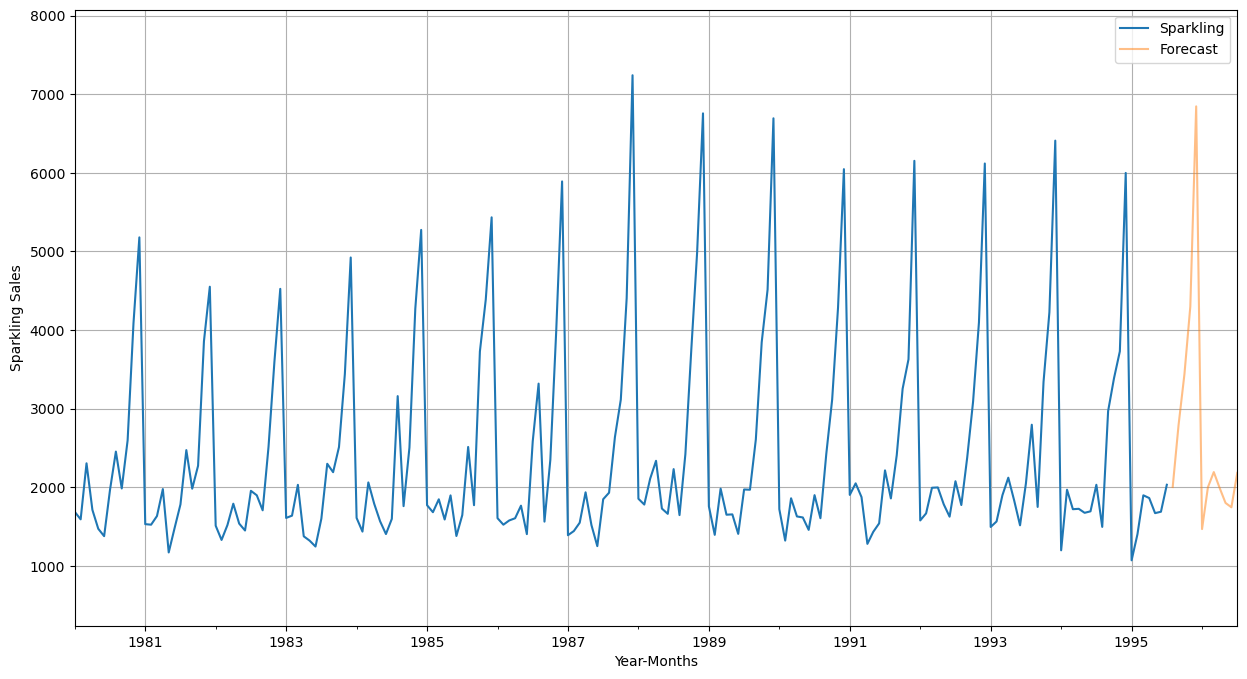

In [110]:
axis = data2.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='r', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.grid()
plt.plot()

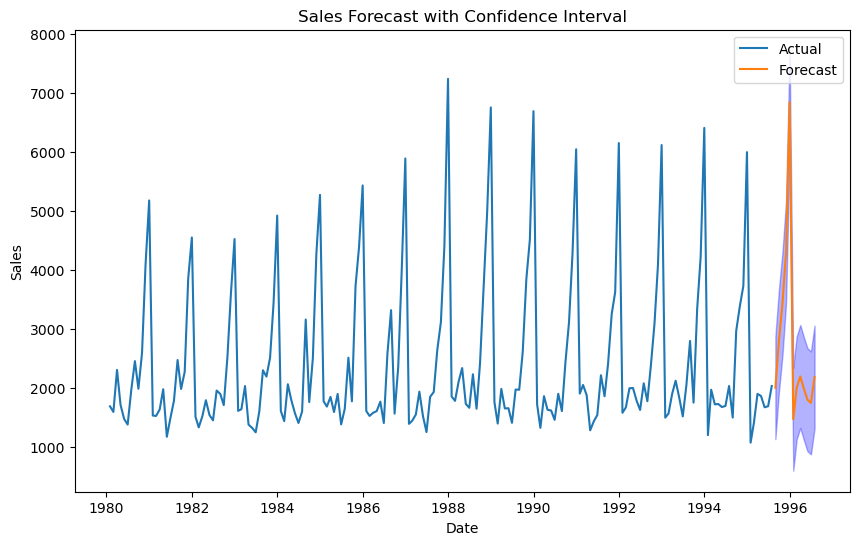

In [111]:
# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Sparkling'], label='Actual')

# Plot the forecasted values
plt.plot(pred_1_df.index, pred_1_df['prediction'], label='Forecast')

# Plot the confidence interval
plt.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='blue', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Confidence Interval')
plt.legend()
plt.show()

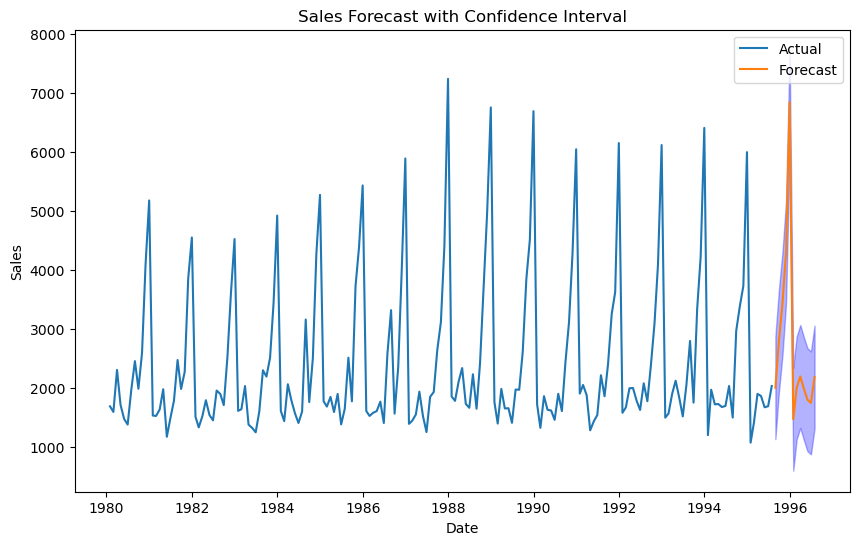

In [112]:
plt.figure(figsize=(10, 6))
# Plot the actual data
sns.lineplot(data=data2, x=data2.index, y='Sparkling', label='Actual')
# Plot the forecasted values
sns.lineplot(data=pred_1_df, x=pred_1_df.index, y='prediction', label='Forecast')
# Plot the confidence interval
plt.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='blue', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Confidence Interval')
plt.legend()
plt.show()
